In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Load and prepare data.

In [2]:
data = read_csv('data/data.csv')

## quick QA.
print('missing: %0.3f' %data.rt.isnull().mean())
print('rapid guessing: %0.3f' %(data.rt < 3).mean())

data['accuracy'] = data['accuracy'].fillna(0)
data['rt'] = data['rt'].fillna(30)
data['logrt'] = np.log(data.rt)

missing: 0.013
rapid guessing: 0.011


## Stratification

#### Items

<AxesSubplot:xlabel='item', ylabel='count'>

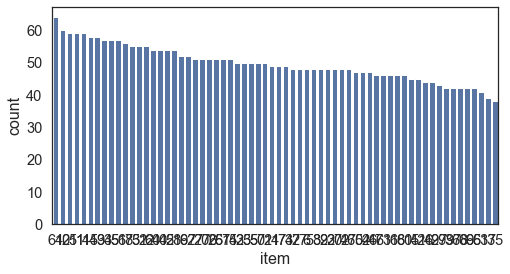

In [3]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))
order = data.item.value_counts().sort_values(ascending=False).index

sns.countplot(x='item', data=data, order=order, color='#4c72b0', ax=ax)

#### Test forms

<AxesSubplot:xlabel='item', ylabel='test_form'>

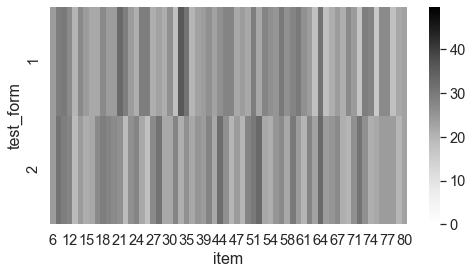

In [4]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

pivot = data.pivot_table('trial', 'test_form', 'item', aggfunc='count')

vmax = data.subject.nunique() * 0.25
sns.heatmap(pivot, vmin=0, vmax=vmax, center=vmax/2, cmap='Greys', ax=ax)

#### Distractors

<AxesSubplot:xlabel='item', ylabel='distractor'>

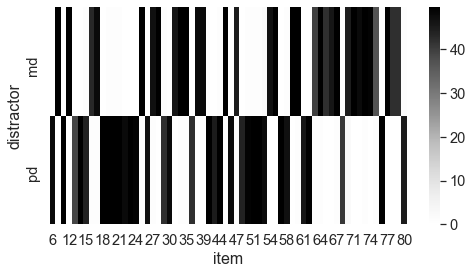

In [5]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

pivot = data.pivot_table('trial', 'distractor', 'item', aggfunc='count').fillna(0)

vmax = data.subject.nunique() * 0.25
sns.heatmap(pivot, vmin=0, vmax=vmax, center=vmax/2, cmap='Greys', ax=ax)

## Summary

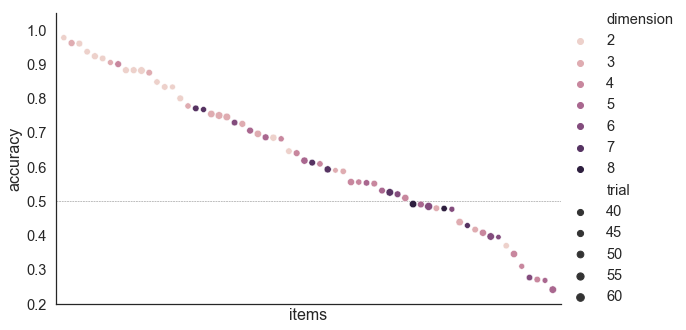

In [6]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(10,5))

## Compute summary statistics.
gb = data.groupby('item').agg({'trial':'count','accuracy':'mean','dimension':'mean'})
gb = gb.loc[gb.accuracy.sort_values(ascending=False).index]
n_item = gb.shape[0]

## Plot accuracy.
sns.scatterplot(x=np.arange(n_item), y=gb.accuracy, hue=gb.dimension, size=gb.trial, 
                data=gb, size_norm=(30,70), ax=ax)
ax.axhline(0.5, color='0.5', lw=0.5, linestyle='--', zorder=-1)

## Add details.
ax.set(xlim=(-1, n_item), xticks=[], xlabel='items', ylim=(0.2,1.05), ylabel='accuracy')
ax.legend(loc=7, bbox_to_anchor=(1.25,0.5), frameon=False)

sns.despine()
plt.tight_layout()